<a href="https://colab.research.google.com/github/jay10440/full-statistical-projects/blob/main/Grade_Analysis_Shell_Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Installing necessary packages to do the data analysis:
install.packages(c("dplyr","ggplot2","readr","pacman"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
pacman::p_load(dplyr,ggplot2,readr)

In [6]:
#Loading in the grades: Important, the grades does not have a grade row.
raw_data<- read_csv("25SP_F2_MAT110_W10_Grades.csv")
#Keeping the final grades, and renaming it grades:
grades<-raw_data %>%
  select(`Calculated Final Grade Numerator`) %>%
  rename(Grade = `Calculated Final Grade Numerator`)

#Just in case, clean up blanks and NAs
grades <- grades %>% filter(!is.na(Grade))

head(grades)

Rows: 26 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): OrgDefinedId, End-of-Line Indicator
dbl (2): Calculated Final Grade Numerator, Calculated Final Grade Denominator

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Grade
<dbl>
97.8200
88.6250
80.5500
95.7375
83.7625
85.3175


In [7]:
#Setting up and cleaning the data:
str(grades) #determining the structure of the data
grades<- grades %>% filter(!is.na(Grade)) # gets rid of NA values
summary(grades$Grade) #Basic statistics

tibble [26 × 1] (S3: tbl_df/tbl/data.frame)
 $ Grade: num [1:26] 97.8 88.6 80.5 95.7 83.8 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   75.90   83.50   77.52   95.17   99.14 

Making a boxplot:

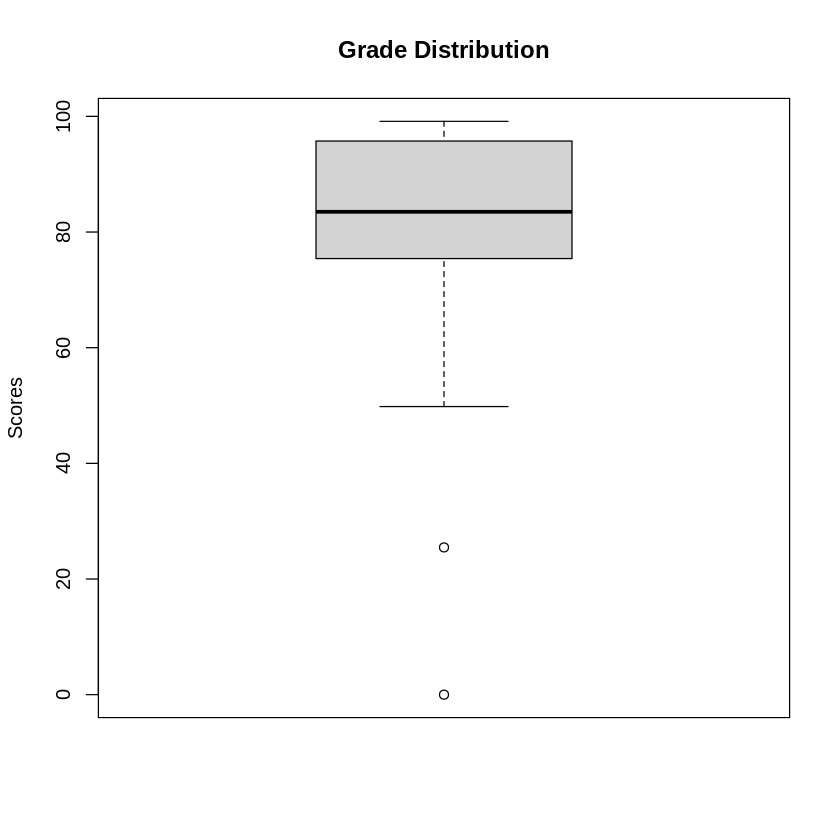

In [8]:
boxplot(grades, main="Grade Distribution", ylab="Scores")

OK, this is obviously left skewed lol.

Histogram

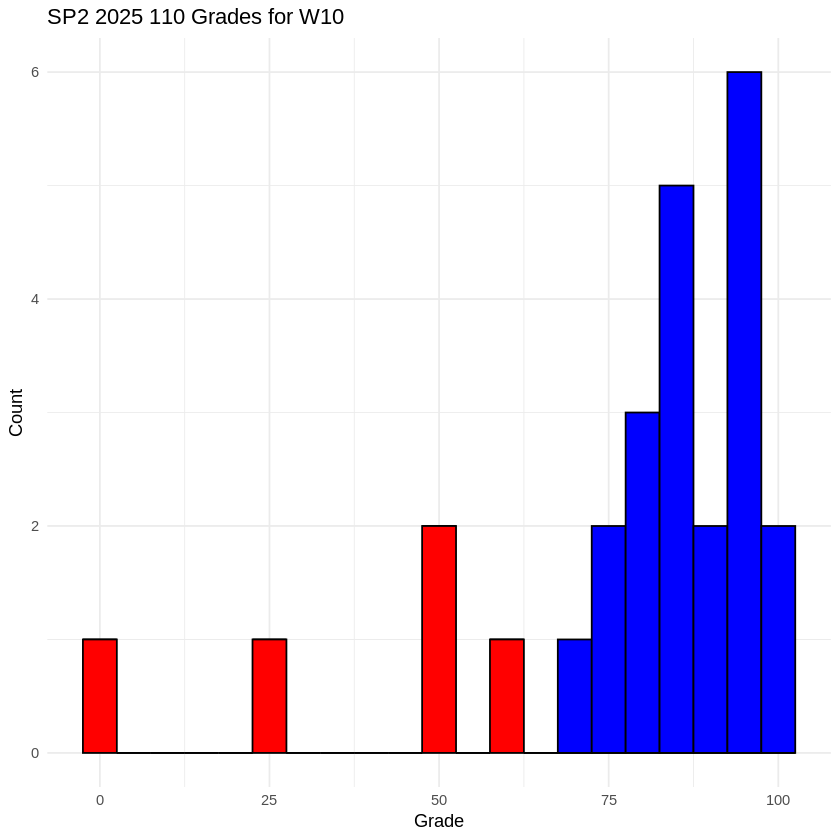

In [10]:
grades<- grades %>%
  mutate(Color = ifelse(Grade < 65, "red","blue"))

ggplot(grades, aes(x= Grade, fill=Color)) +
  geom_histogram(binwidth=5, color = "black") +
    scale_fill_identity() +
      theme_minimal() +
        labs(title = "SP2 2025 110 Grades for W10", x="Grade",y="Count")

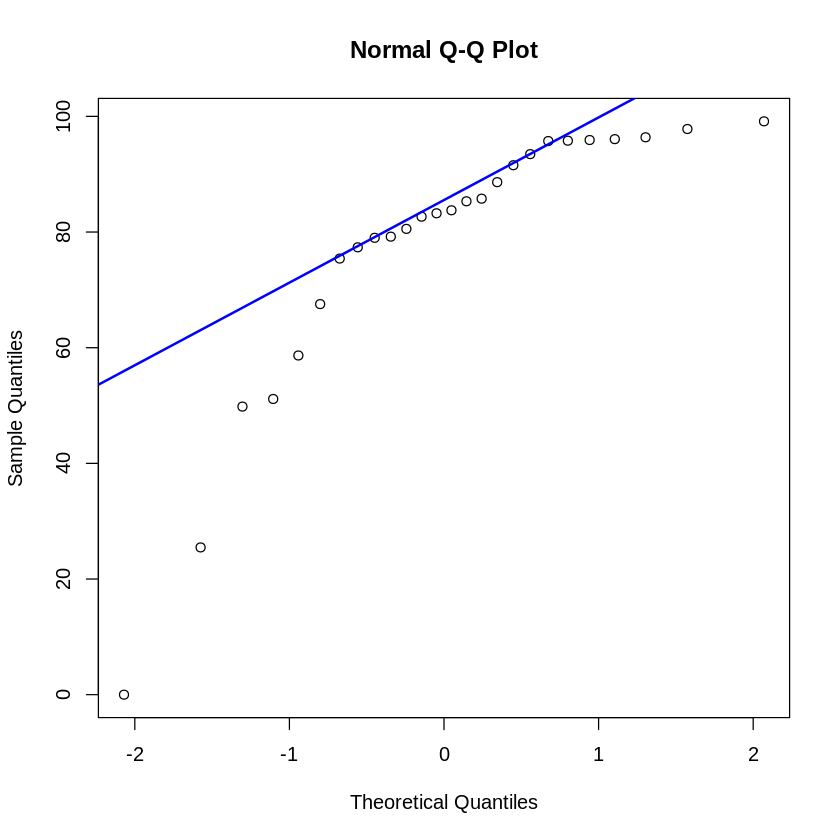

In [11]:
#Some data analysis.
#So this is obviously not normal lol.
qqnorm(grades$Grade)
qqline(grades$Grade, col= "blue", lwd=2)

This is reminiscent of a beta distribution from what I saw in the histogram. Let's test to see if it is!

In [ ]:
#Qualities of a beta distribution is that it has to be between 0 and 1.
#This is nice because we have a scale of 100. Divide each value by 100.
